In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'to code - Copy - 2.xlsx' 
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Select relevant columns for origin and destination coordinates
numerical_columns = ['D_ORIXCOOR', 'D_ORIYCOOR', 'D_DESTXCOOR', 'D_DESTYCOOR']
data_numerical = data[numerical_columns]


In [28]:
# Cell 2: Preprocess Data with Frequency Adjustment
from sklearn.preprocessing import QuantileTransformer

# Use QuantileTransformer to adjust data to a uniform distribution
quantile_transformer = QuantileTransformer(output_distribution='uniform', random_state=42)
transformed_data = quantile_transformer.fit_transform(data_numerical)

# Prepare features (X) and targets (y) for training
X = transformed_data
y = transformed_data  # Using the same columns as targets for consistency


In [29]:
# Cell 3: Define the Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_dim=X.shape[1]),  # Increased neurons for better learning
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(X.shape[1], activation='linear')  # Output layer to match feature dimensions
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Model defined and compiled.")


Model defined and compiled.


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Cell 4: Train the Neural Network Model
history = model.fit(
    X, y,
    epochs=200,  # Increased training epochs for better learning
    batch_size=16,  # Smaller batch size for finer updates
    validation_split=0.2,  # Use 20% of data for validation
    verbose=2  # Display detailed progress
)

print("Model training complete.")


Epoch 1/200
609/609 - 1s - 2ms/step - loss: 0.0155 - mae: 0.0881 - val_loss: 5.2752e-04 - val_mae: 0.0174
Epoch 2/200
609/609 - 1s - 1ms/step - loss: 0.0064 - mae: 0.0605 - val_loss: 6.5302e-04 - val_mae: 0.0200
Epoch 3/200
609/609 - 1s - 922us/step - loss: 0.0050 - mae: 0.0538 - val_loss: 6.0699e-04 - val_mae: 0.0194
Epoch 4/200
609/609 - 1s - 980us/step - loss: 0.0044 - mae: 0.0506 - val_loss: 5.6867e-04 - val_mae: 0.0185
Epoch 5/200
609/609 - 1s - 924us/step - loss: 0.0041 - mae: 0.0491 - val_loss: 3.7059e-04 - val_mae: 0.0155
Epoch 6/200
609/609 - 1s - 945us/step - loss: 0.0040 - mae: 0.0480 - val_loss: 4.8029e-04 - val_mae: 0.0166
Epoch 7/200
609/609 - 1s - 919us/step - loss: 0.0038 - mae: 0.0473 - val_loss: 8.0011e-04 - val_mae: 0.0229
Epoch 8/200
609/609 - 1s - 972us/step - loss: 0.0037 - mae: 0.0468 - val_loss: 5.2525e-04 - val_mae: 0.0180
Epoch 9/200
609/609 - 1s - 907us/step - loss: 0.0036 - mae: 0.0462 - val_loss: 8.7410e-04 - val_mae: 0.0239
Epoch 10/200
609/609 - 1s - 913u

In [31]:
# Cell 5: Generate Synthetic Data with Frequency Resemblance
# Generate random uniform inputs to mimic transformed distribution
random_input = np.random.uniform(0, 1, (1000, X.shape[1]))

# Predict outputs using the trained model
synthetic_output = model.predict(random_input)

# Reverse the quantile transformation to match the original data's frequency distribution
synthetic_data = quantile_transformer.inverse_transform(synthetic_output)
synthetic_data = pd.DataFrame(synthetic_data, columns=numerical_columns)

print("Synthetic data generated with frequency resemblance:")
print(synthetic_data.head())


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic data generated with frequency resemblance:
   D_ORIXCOOR  D_ORIYCOOR  D_DESTXCOOR  D_DESTYCOOR
0    293500.0   5044500.0   283414.375    5044500.0
1    291500.0   5047500.0   293500.000    5048500.0
2    288500.0   5048500.0   290500.000    5044500.0
3    287500.0   5043500.0   292500.000    5043500.0
4    286500.0   5045500.0   293500.000    5046500.0


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


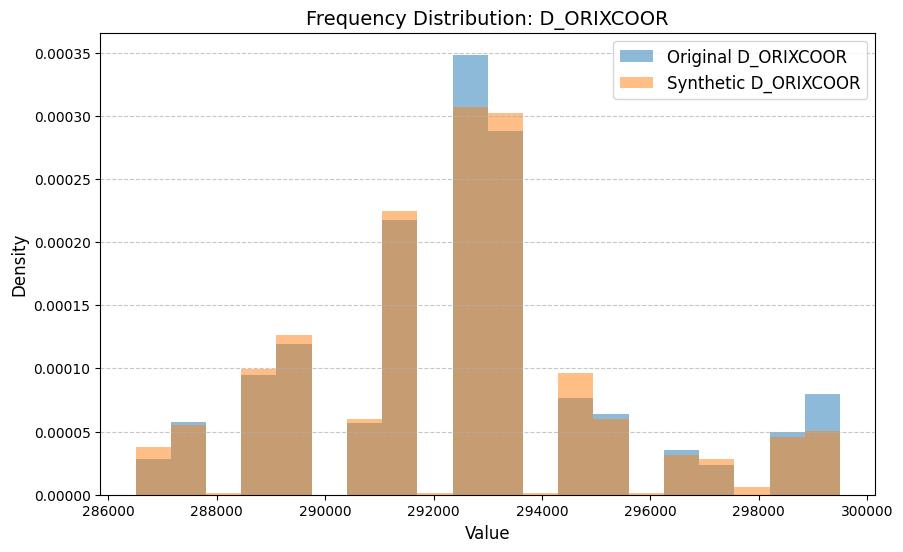

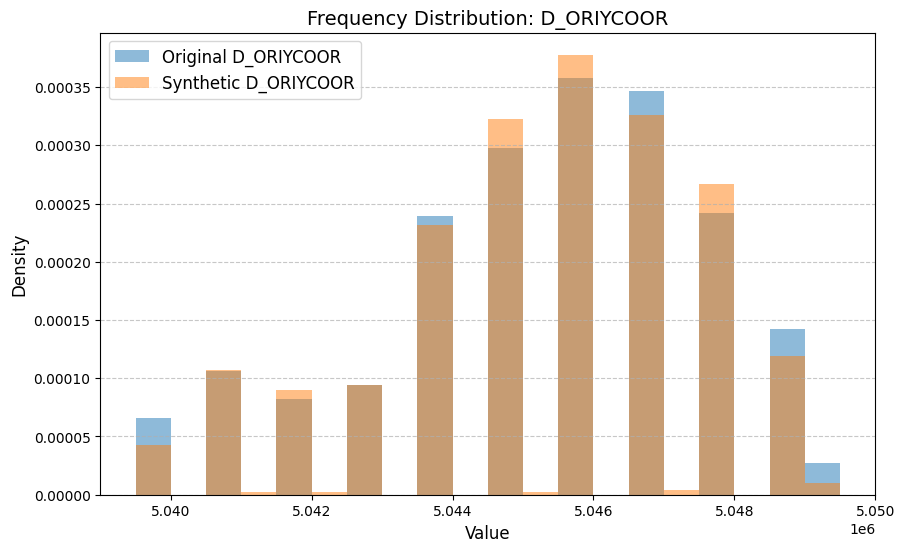

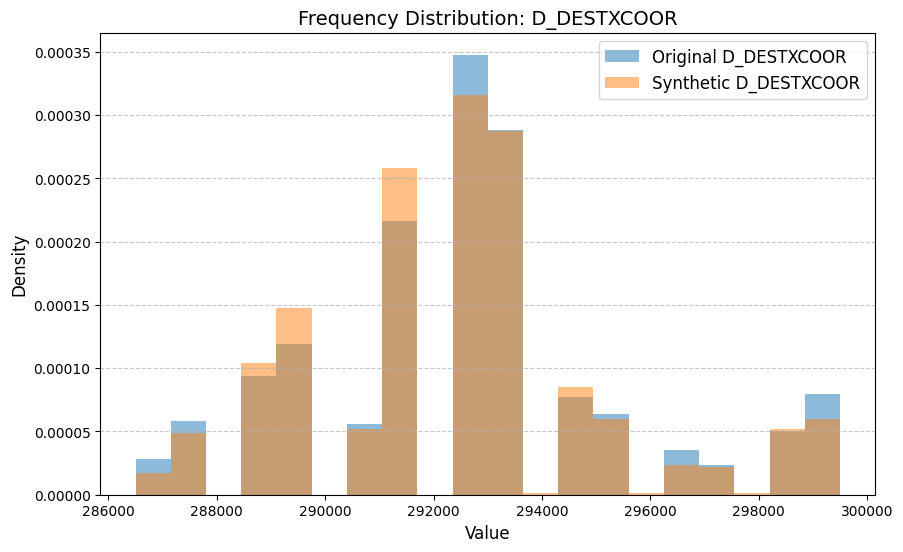

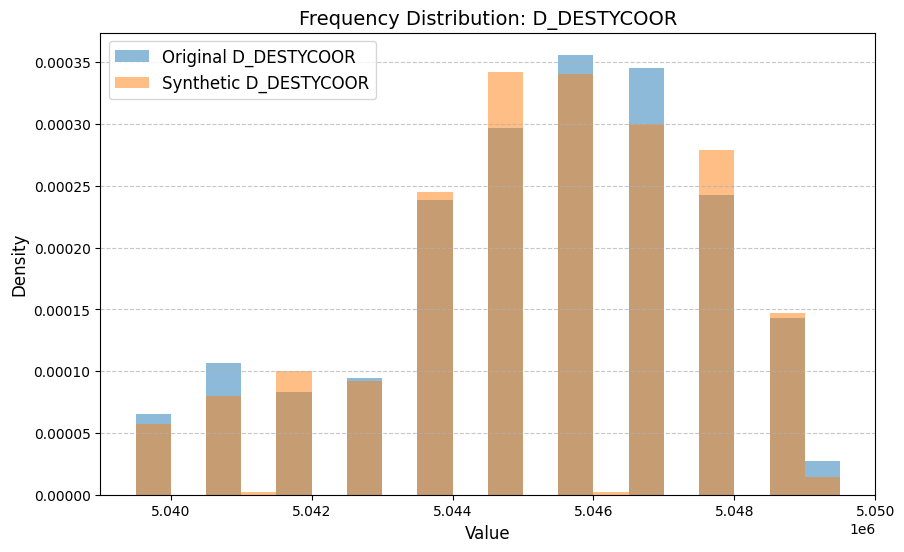

In [34]:
# Cell 6: Dynamic Filtering for Each Column's Range
def compare_frequency_distributions_dynamic(original, synthetic, column_name):
    """
    Dynamically determine filtering range and compare frequency distributions.
    """
    # Determine the range based on the 5th and 95th percentiles of the original data
    filter_min = original.quantile(0.05)
    filter_max = original.quantile(0.95)
    
    # Filter data
    original_filtered = original[(original >= filter_min) & (original <= filter_max)]
    synthetic_filtered = synthetic[(synthetic >= filter_min) & (synthetic <= filter_max)]
    
    # Plot histograms
    fig, ax = plt.subplots(figsize=(10, 6))
    n, bins, _ = ax.hist(original_filtered, bins=20, density=True, alpha=0.5, label=f'Original {column_name}')
    ax.hist(synthetic_filtered, bins=bins, density=True, alpha=0.5, label=f'Synthetic {column_name}')
    
    # Add labels, title, and legend
    ax.set_title(f'Frequency Distribution: {column_name}', fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Compare frequency distributions dynamically for each numerical column
for column in numerical_columns:
    compare_frequency_distributions_dynamic(data[column], synthetic_data[column], column)


In [35]:
import os

# Directory to save plots
plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save synthetic data to a CSV file
synthetic_data.to_csv("synthetic_data.csv", index=False)
print("Synthetic data saved as 'synthetic_data.csv'.")

# Function to save plots
def save_frequency_distribution_plots(original, synthetic, column_name):
    """
    Save the frequency distribution comparison plots for a given column.
    """
    # Calculate dynamic range
    filter_min = original.quantile(0.05)
    filter_max = original.quantile(0.95)
    
    # Filter data
    original_filtered = original[(original >= filter_min) & (original <= filter_max)]
    synthetic_filtered = synthetic[(synthetic >= filter_min) & (synthetic <= filter_max)]
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    n, bins, _ = ax.hist(original_filtered, bins=20, density=True, alpha=0.5, label=f'Original {column_name}')
    ax.hist(synthetic_filtered, bins=bins, density=True, alpha=0.5, label=f'Synthetic {column_name}')
    
    # Add labels, title, and legend
    ax.set_title(f'Frequency Distribution: {column_name}', fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save plot
    plot_path = os.path.join(plot_dir, f"{column_name}_distribution.png")
    plt.savefig(plot_path)
    plt.close()
    print(f"Plot saved: {plot_path}")

# Save plots for all numerical columns
for column in numerical_columns:
    save_frequency_distribution_plots(data[column], synthetic_data[column], column)


Synthetic data saved as 'synthetic_data.csv'.
Plot saved: plots\D_ORIXCOOR_distribution.png
Plot saved: plots\D_ORIYCOOR_distribution.png
Plot saved: plots\D_DESTXCOOR_distribution.png
Plot saved: plots\D_DESTYCOOR_distribution.png
